In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# read dataset
data = pd.read_csv('credit_risk_dataset.csv')

In [4]:
data.shape

(24435, 13)

In [5]:
data.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,30786,41,40000,RENT,3.0,PERSONAL,A,9200,7.49,0,0.23,N,13
1,29460,44,28000,OWN,0.0,VENTURE,A,3500,8.94,0,0.13,N,12
2,7059,22,56000,RENT,0.0,DEBTCONSOLIDATION,B,7000,11.36,0,0.13,N,2
3,5377,24,45000,MORTGAGE,2.0,PERSONAL,A,7200,7.29,0,0.16,N,4
4,27170,28,55000,RENT,3.0,HOMEIMPROVEMENT,E,15000,17.06,0,0.27,Y,5


In [6]:
# remove index column
data = data.drop(['Unnamed: 0'], axis = 1)
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,41,40000,RENT,3.0,PERSONAL,A,9200,7.49,0,0.23,N,13
1,44,28000,OWN,0.0,VENTURE,A,3500,8.94,0,0.13,N,12
2,22,56000,RENT,0.0,DEBTCONSOLIDATION,B,7000,11.36,0,0.13,N,2
3,24,45000,MORTGAGE,2.0,PERSONAL,A,7200,7.29,0,0.16,N,4
4,28,55000,RENT,3.0,HOMEIMPROVEMENT,E,15000,17.06,0,0.27,Y,5
...,...,...,...,...,...,...,...,...,...,...,...,...
24430,23,45000,RENT,7.0,EDUCATION,B,9000,10.65,0,0.20,N,2
24431,26,125000,MORTGAGE,3.0,EDUCATION,D,24000,15.28,0,0.19,Y,4
24432,43,138000,MORTGAGE,4.0,EDUCATION,A,9900,6.99,0,0.07,N,14
24433,27,84780,MORTGAGE,5.0,VENTURE,A,18000,7.51,0,0.21,N,10


### Exploratory data analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24435 entries, 0 to 24434
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  24435 non-null  int64  
 1   person_income               24435 non-null  int64  
 2   person_home_ownership       24435 non-null  object 
 3   person_emp_length           23778 non-null  float64
 4   loan_intent                 24435 non-null  object 
 5   loan_grade                  24435 non-null  object 
 6   loan_amnt                   24435 non-null  int64  
 7   loan_int_rate               22113 non-null  float64
 8   loan_status                 24435 non-null  int64  
 9   loan_percent_income         24435 non-null  float64
 10  cb_person_default_on_file   24435 non-null  object 
 11  cb_person_cred_hist_length  24435 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.2+ MB


In [8]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              657
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2322
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,24435.000000,2.443500e+04,23778.000000,24435.000000,22113.000000,24435.000000,24435.000000,24435.000000
mean,27.735543,6.593704e+04,4.778072,9558.179865,11.006377,0.216984,0.169988,5.807858
std,6.333269,6.540541e+04,4.091264,6324.925845,3.241424,0.412200,0.106785,4.066610
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.873500e+04,7.000000,12100.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


/tmp/ipykernel_25461/3856751227.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

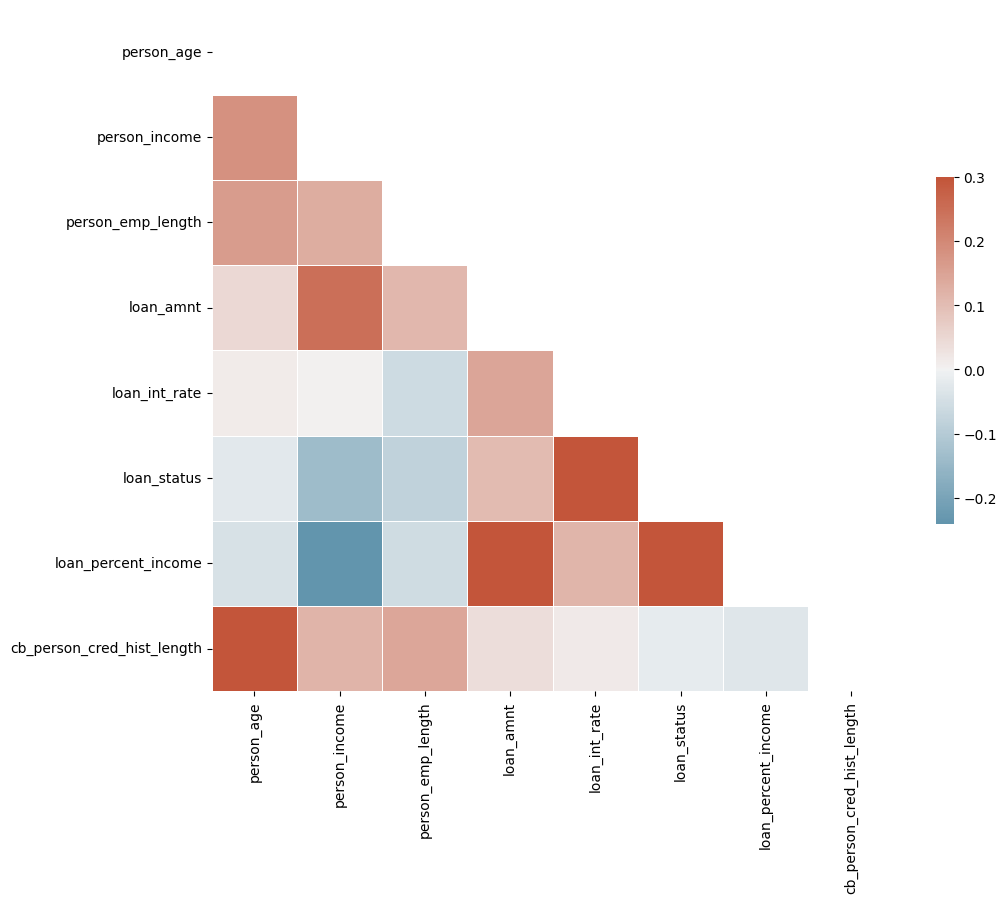

In [10]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot: xlabel='loan_status', ylabel='Count'>

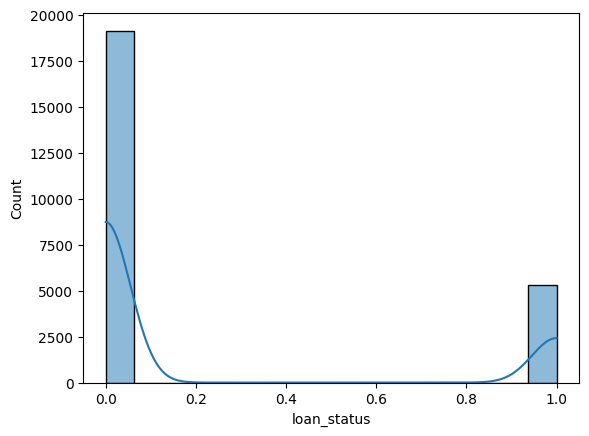

In [11]:
sns.histplot(data['loan_status'], kde=True)

<AxesSubplot: xlabel='person_age', ylabel='Count'>

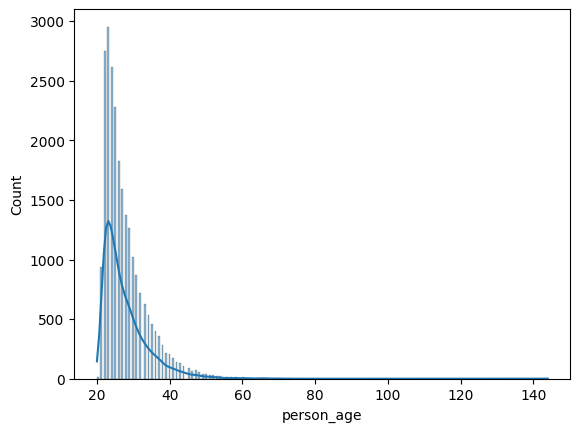

In [12]:
sns.histplot(data['person_age'], kde=True)

<AxesSubplot: xlabel='person_emp_length', ylabel='Count'>

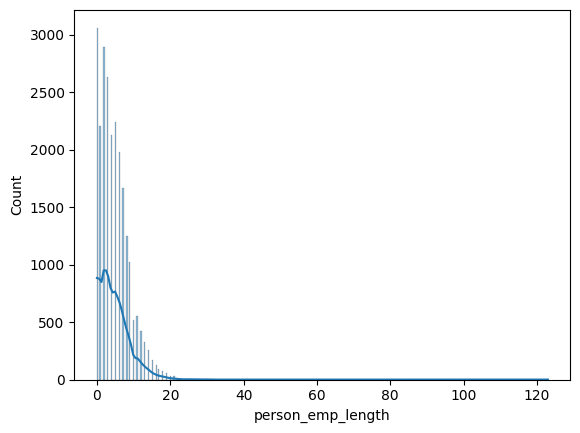

In [13]:
sns.histplot(data['person_emp_length'], kde=True)

In [14]:
# features = data.select_dtypes(exclude='object').columns.drop("loan_status").tolist()
# for col in features:
#     print("\n")
#     fig, ax =plt.subplots(1,3, figsize=(15,6))
#     sns.boxplot(data=data, y=col, ax=ax[0])
#     sns.scatterplot(data=data,x = 'loan_status', s = 100, y=col, ax=ax[1])
#     sns.violinplot(data=data, s = 100, y=col, ax=ax[2])
#     plt.show()

### Data Preporocessing

In [15]:
# droping null values
data = data.dropna()

In [16]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### Separate predictors and class

In [17]:
Y = data['loan_status']
Y.unique()

array([0, 1])

In [18]:
X = data.drop(columns=['loan_status'])
X 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,41,40000,RENT,3.0,PERSONAL,A,9200,7.49,0.23,N,13
1,44,28000,OWN,0.0,VENTURE,A,3500,8.94,0.13,N,12
2,22,56000,RENT,0.0,DEBTCONSOLIDATION,B,7000,11.36,0.13,N,2
3,24,45000,MORTGAGE,2.0,PERSONAL,A,7200,7.29,0.16,N,4
4,28,55000,RENT,3.0,HOMEIMPROVEMENT,E,15000,17.06,0.27,Y,5
...,...,...,...,...,...,...,...,...,...,...,...
24430,23,45000,RENT,7.0,EDUCATION,B,9000,10.65,0.20,N,2
24431,26,125000,MORTGAGE,3.0,EDUCATION,D,24000,15.28,0.19,Y,4
24432,43,138000,MORTGAGE,4.0,EDUCATION,A,9900,6.99,0.07,N,14
24433,27,84780,MORTGAGE,5.0,VENTURE,A,18000,7.51,0.21,N,10


In [19]:
encoder = preprocessing.LabelEncoder()
X['person_home_ownership'] = encoder.fit_transform(X['person_home_ownership'])
X['loan_intent'] = encoder.fit_transform(X['loan_intent'])
X['loan_grade'] = encoder.fit_transform(X['loan_grade'])
X['cb_person_default_on_file'] = encoder.fit_transform(X['cb_person_default_on_file'])

In [20]:
scaler = preprocessing.StandardScaler()
Xs = scaler.fit_transform(X)

In [21]:
Xs

array([[ 2.10970745, -0.40191876,  0.92418283, ...,  0.5721516 ,
        -0.46532578,  1.78433379],
       [ 2.58620283, -0.58372078,  0.22810858, ..., -0.36874733,
        -0.46532578,  1.53693878],
       [-0.9080966 , -0.15951607,  0.92418283, ..., -0.36874733,
        -0.46532578, -0.93701134],
       ...,
       [ 2.42737103,  1.08279771, -1.16403991, ..., -0.93328669,
        -0.46532578,  2.0317288 ],
       [-0.11393764,  0.27650576, -1.16403991, ...,  0.38397181,
        -0.46532578,  1.04214876],
       [ 0.52138953,  0.43134048,  0.92418283, ..., -1.30964627,
         2.149032  ,  1.04214876]])

In [22]:
Xs.shape

(21507, 11)

In [23]:
# Separate training and testing data
x_train, x_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.25, random_state=42)

In [24]:
x_train.shape

(16130, 11)

In [25]:
y_train.shape

(16130,)

In [26]:
x_test.shape, y_test.shape

((5377, 11), (5377,))

### Models

#### Naive Bayes

In [27]:
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)
preds = naive_model.predict(x_test)
preds

array([0, 1, 1, ..., 0, 0, 1])

In [28]:
y_test

474      0
3538     1
10883    1
23371    0
11780    0
        ..
21200    0
8034     0
6958     0
11848    1
18021    1
Name: loan_status, Length: 5377, dtype: int64

In [29]:
metrics.accuracy_score(y_test, preds)

0.8054677329365817

In [30]:
metrics.confusion_matrix(y_test, preds)

array([[3578,  634],
       [ 412,  753]])

In [31]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4212
           1       0.54      0.65      0.59      1165

    accuracy                           0.81      5377
   macro avg       0.72      0.75      0.73      5377
weighted avg       0.82      0.81      0.81      5377



#### Decision Trees

In [32]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
preds = tree_model.predict(x_test)
preds

array([0, 1, 1, ..., 0, 1, 1])

In [34]:
metrics.accuracy_score(y_test, preds)

0.8867398177422354

In [35]:
metrics.confusion_matrix(y_test, preds)

array([[3881,  331],
       [ 278,  887]])

In [36]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4212
           1       0.73      0.76      0.74      1165

    accuracy                           0.89      5377
   macro avg       0.83      0.84      0.84      5377
weighted avg       0.89      0.89      0.89      5377



#### K-Nearest Neighbour

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [38]:
preds = knn_model.predict(x_test)
preds

array([0, 1, 0, ..., 0, 0, 1])

In [39]:
metrics.accuracy_score(y_test, preds)

0.877068997582295

In [40]:
metrics.confusion_matrix(y_test, preds)

array([[4099,  113],
       [ 548,  617]])

In [41]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      4212
           1       0.85      0.53      0.65      1165

    accuracy                           0.88      5377
   macro avg       0.86      0.75      0.79      5377
weighted avg       0.87      0.88      0.87      5377

